In [1]:
from os.path import join
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from recgame.recourse import NFeatureRecourse
from recgame.populations import BasePopulation
from recgame.environments import BankLoanApplication3
from recgame.utils import generate_synthetic_data

In [2]:
set_matplotlib_style(16)
SAVE_PATH = "../assets/multi-agent-dynamic-counterfactual-recourse/analysis/"

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.3  # 0.5  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [3]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
#population.action_set_.ub = [1, 1]
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication3(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(50)

<Axes: title={'center': 'Population scores over 51 time steps'}, xlabel='Step', ylabel='Score'>

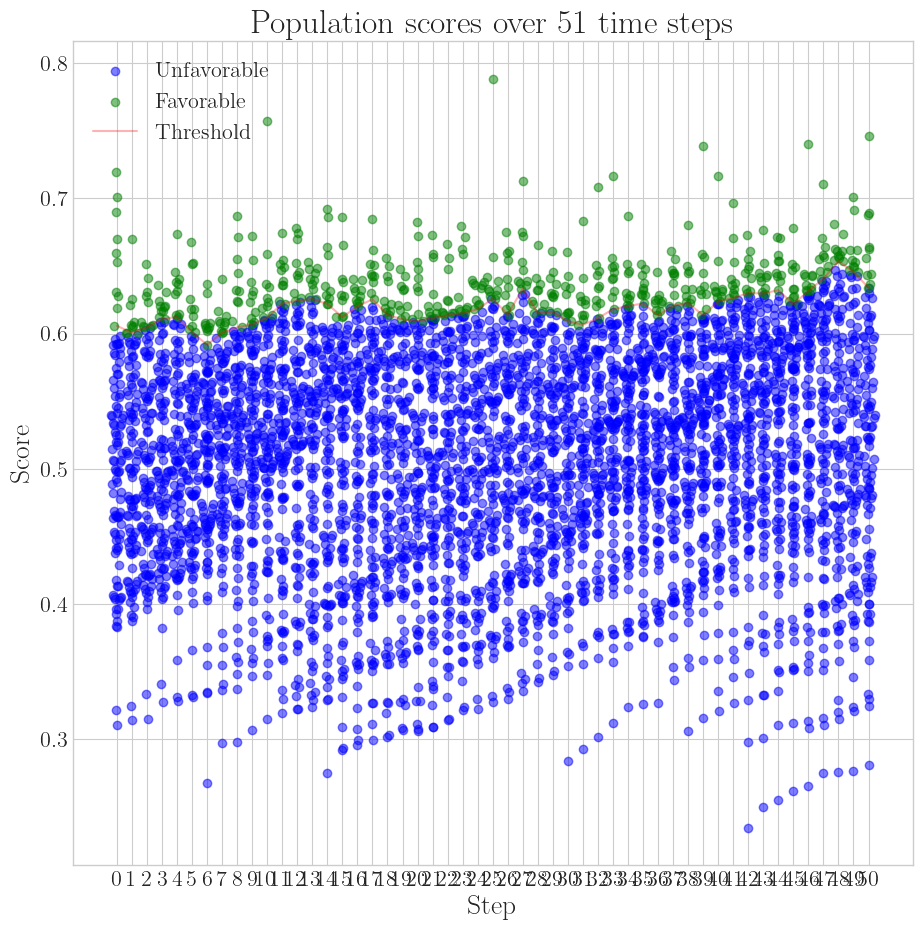

In [4]:
environment.plot.agent_scores()

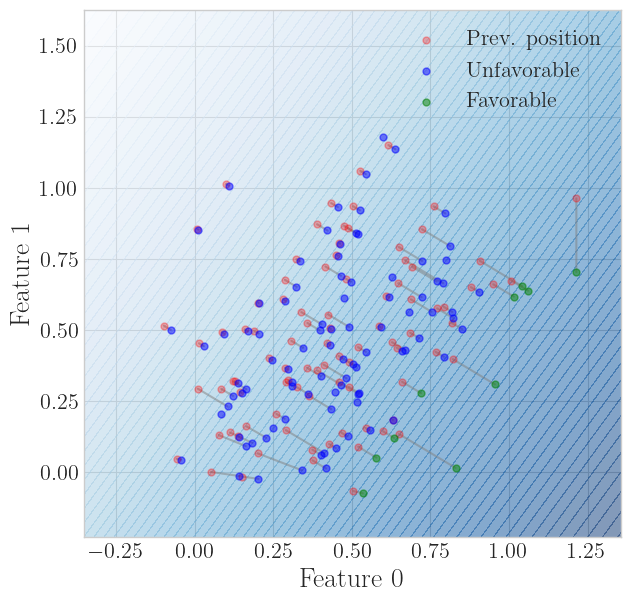

In [5]:
set_matplotlib_style(16, **{"lines.markersize": 5})
fig, ax = plt.subplots(1, 1, figsize=[6.4, 6.4])
ax = environment.plot.scatter(5, title=False, ax=ax)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
plt.savefig(
    join(SAVE_PATH, f"agents_scatter_plot_adaptation_{ADAPTATION}_new_agents_{NEW_AGENTS}.pdf"),
    format="pdf",
    bbox_inches="tight",
)
plt.show()

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

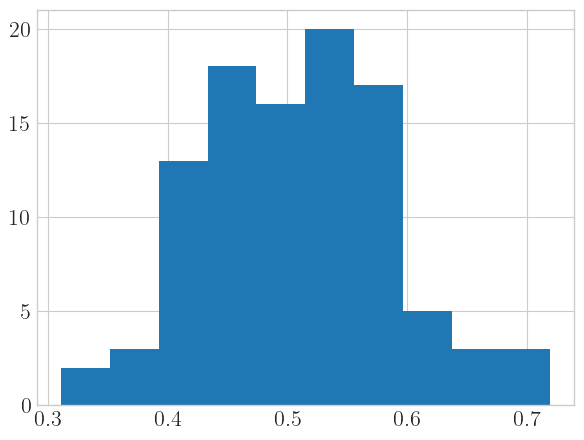

In [6]:
environment.plot.scores_histogram(0)

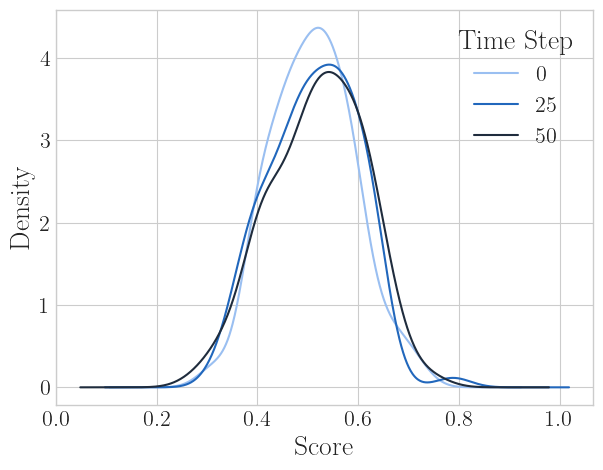

In [7]:
set_matplotlib_style(16)
ax = environment.plot.scores_kde(0, color="#9abff1", legend=True, label="0")
ax = environment.plot.scores_kde(25, color="#2167bc", legend=True, label="25", ax=ax)
ax = environment.plot.scores_kde(50, color="#1f2c3d", legend=True, label="50", ax=ax)
ax.set_xlabel("Score")
ax.legend(title="Time Step")
plt.savefig(
    join(SAVE_PATH, f"agents_scores_distribution_adaptation_{ADAPTATION}_new_agents_{NEW_AGENTS}.pdf"),
    format="pdf",
    bbox_inches="tight",
)
plt.show()

<Axes: title={'center': 'Population size over 51 time steps'}, xlabel='Step', ylabel='Number of agents'>

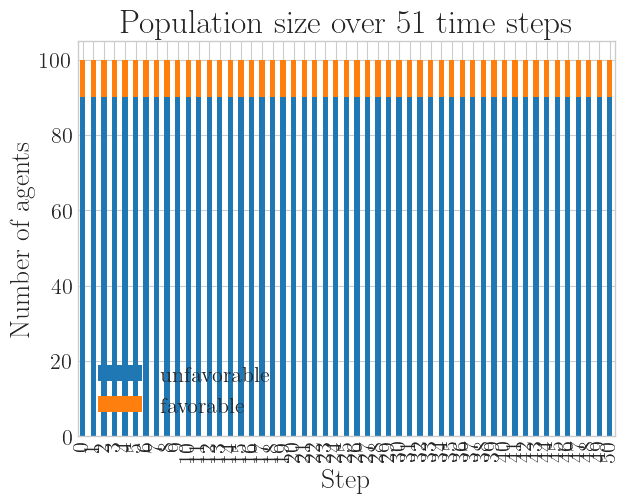

In [8]:
environment.plot.population_size()

In [9]:
environment.success_rate(1, 20)

array([1.        , 0.81818182, 0.75      , 1.        , 1.        ,
       1.        , 0.9       , 0.77777778, 0.875     , 0.57142857,
       0.69230769, 0.88888889, 0.81818182, 1.        , 1.        ,
       0.76923077, 1.        , 1.        , 1.        ])

In [10]:
environment.threshold_drift(1, 20)

array([-0.00838797,  0.00678184,  0.01000897,  0.00242648, -0.01830782,
       -0.01556116,  0.01534124,  0.00632539,  0.00356923,  0.00856449,
        0.01673866,  0.00360323,  0.00180027, -0.00575402, -0.01566055,
        0.0130615 ,  0.00824025, -0.01810755, -0.00578504, -0.00193355])

In [11]:
steps_info = environment.steps_info()
steps_info.tail(10)

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
41,90.0,11.0,10.0,0.909091,0.626265,0.003852,10.0,0.08,0.117066,0.081089
42,90.0,12.0,10.0,0.833333,0.629933,0.005857,10.0,0.07,0.104134,0.169085
43,90.0,9.0,10.0,1.000000,0.629648,-0.000453,10.0,0.07,0.101249,0.186016
44,90.0,10.0,10.0,1.000000,0.632082,0.003866,10.0,0.06,0.071278,0.583802
45,90.0,3.0,10.0,1.000000,0.621759,-0.016332,10.0,0.08,0.147173,0.006961
46,90.0,13.0,10.0,0.615385,0.631493,0.015655,10.0,0.06,0.135415,0.021823
47,90.0,13.0,10.0,0.615385,0.640669,0.014530,10.0,0.06,0.120996,0.050547
48,90.0,13.0,10.0,0.769231,0.653495,0.020021,10.0,0.05,0.064051,0.651901
49,90.0,4.0,10.0,1.000000,0.645682,-0.011956,10.0,0.06,0.064869,0.643539
50,90.0,5.0,10.0,1.000000,0.633953,-0.018165,10.0,0.06,0.077983,0.424627


,success_proba,threshold_drift
success_proba,1.000000,0.650318
threshold_drift,0.650318,1.000000


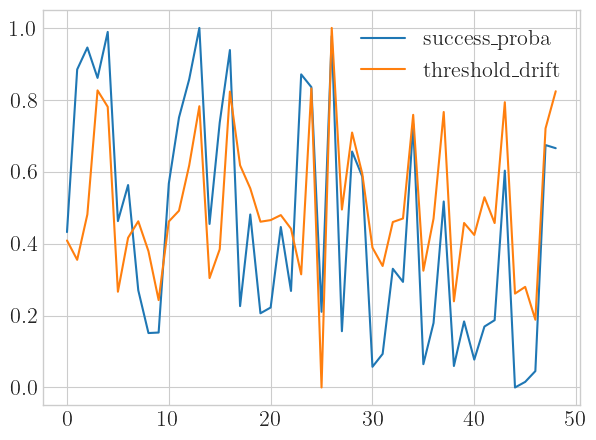

In [12]:
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.threshold_drift.iloc[1:].reset_index(drop=True) * -1,
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

In [13]:
steps_info.astype(float).corr().round(2)

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
n_adapted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_candidates,NaN,1.00,NaN,-0.79,0.24,0.80,NaN,-0.19,-0.08,0.09
favorable_outcomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
success_rate,NaN,-0.79,NaN,1.00,-0.26,-0.74,NaN,0.27,-0.09,0.07
threshold,NaN,0.24,NaN,-0.26,1.00,0.34,NaN,-0.89,-0.32,0.06
threshold_drift,NaN,0.80,NaN,-0.74,0.34,1.00,NaN,-0.36,-0.21,0.20
new_agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_agents_proba,NaN,-0.19,NaN,0.27,-0.89,-0.36,NaN,1.00,0.23,-0.01
moving_agent_proba,NaN,-0.08,NaN,-0.09,-0.32,-0.21,NaN,0.23,1.00,-0.90
success_proba,NaN,0.09,NaN,0.07,0.06,0.20,NaN,-0.01,-0.90,1.00


In [14]:
agents_info = environment.agents_info()
agents_info

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,1,1.0,0.592102,0.600642,0
1,0,4,4.0,0.519861,0.640212,0
2,0,16,16.0,0.417626,0.631746,0
3,0,5,5.0,0.537543,0.601041,0
4,0,1,1.0,0.555235,0.600709,0
...,...,...,...,...,...,...
595,50,0,NaN,0.400084,NaN,0
596,50,0,NaN,0.516938,NaN,0
597,50,0,NaN,0.435314,NaN,0
598,50,0,NaN,0.531451,NaN,0


In [15]:
agents_info.corr()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
entered_step,1.000000,-0.223704,0.868818,0.047053,0.334295,-0.053309
n_adaptations,-0.223704,1.000000,0.308166,-0.807320,-0.070434,0.064121
favorable_step,0.868818,0.308166,1.000000,-0.176115,0.289190,0.056863
original_score,0.047053,-0.807320,-0.176115,1.000000,0.315003,-0.012610
final_score,0.334295,-0.070434,0.289190,0.315003,1.000000,0.114111
n_failures,-0.053309,0.064121,0.056863,-0.012610,0.114111,1.000000


Text(0, 0.5, '\\# Failures (mean)')

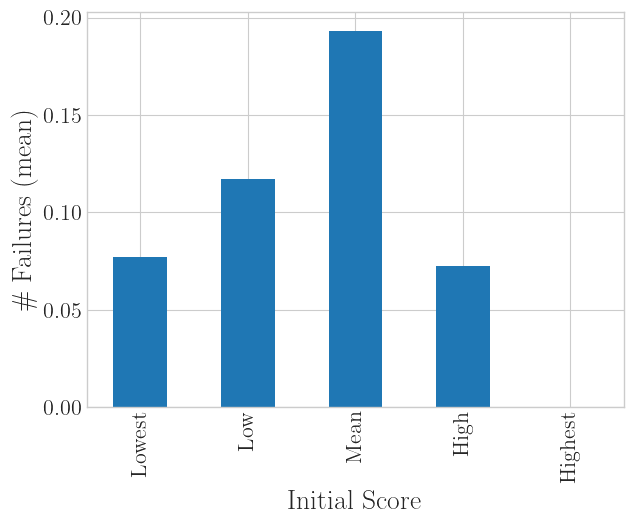

In [16]:
from collections import Counter

# agents_info.plot.bar("n_failures", "n_adaptations")
agents_info_ = agents_info.copy()

agents_info_ = agents_info_[~agents_info_.favorable_step.isna()|agents_info_.n_failures > 0]
agents_info_["Initial Score"] = pd.cut(agents_info_["original_score"], 5, labels=["Lowest", "Low", "Mean", "High", "Highest"])
# agents_info_["success_rate"] = 

agents_info_.groupby(["Initial Score"]).mean()[["n_adaptations", "final_score", "n_failures"]]

ax = agents_info_.groupby(["Initial Score"]).mean()["n_failures"].plot.bar()
ax.set_ylabel("\# Failures (mean)")